<a href="https://colab.research.google.com/github/vibha314/chandani/blob/master/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruit_data_with_colors.txt')


In [0]:
fruits.head()

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.8,0.55
1,1,apple,180,8.0,7.3,0.59
2,1,apple,89,7.5,6.8,0.60
3,2,mandarin,78,7.4,4.5,0.80
4,2,mandarin,89,6.2,4.6,0.79


In [7]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [0]:
 ### CREATE TEST SPLIT OBJECT###
X = fruits[['mass' , 'width', 'height']]
y = fruits['fruit_label']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)


In [0]:
 ### CREATE CLASSIFIER OBJECT##
 
 from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)


In [11]:
knn.fit(X_train, y_train) ###TRAIN THE CLASSIFIER (fit estimator) USING TRAINING DATASET

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [12]:
 ### ESTIMATE THE ACCURACY OF THE CLASSIFIER ON FUTURE DATA,USING TEST DATA###
 knn.score(X_test,y_test)

0.25

In [14]:
 ### USE THE TRAINED K-NN CLASSIFIER MODEL TO CLASSIFY NEW ###
 fruit_prediction = knn.predict([[20, 4.3, 5.5]]) 
lookup_fruit_name[fruit_prediction[0]]

'orange'

([<matplotlib.axis.XTick at 0x7f34a3cde6a0>,
 <a list of 3 Text major ticklabel objects>)

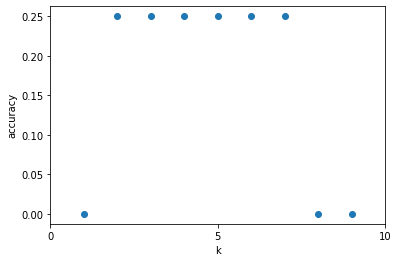

In [18]:
k_range = range(1,10)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range,scores)
plt.xticks([0,5,10])